## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    
![](https://i.imgur.com/0v1CGNV.png)

In [1]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt


df = pd.read_csv('Life expectancy data.csv')
df = df.dropna()
df.head()

,Country,Year,Status,LifeExpectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
from sklearn.tree import DecisionTreeRegressor

# Setting up the test

In [3]:
testSize = 100
features= ['GDP','Schooling','GDP']
dt = DecisionTreeRegressor(max_depth = 5) # Increase max_depth to see effect in the plot
#df[:10][features]
dt.fit(df[:testSize][features], df[:testSize]['Alcohol'])

DecisionTreeRegressor(max_depth=5)

In [4]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

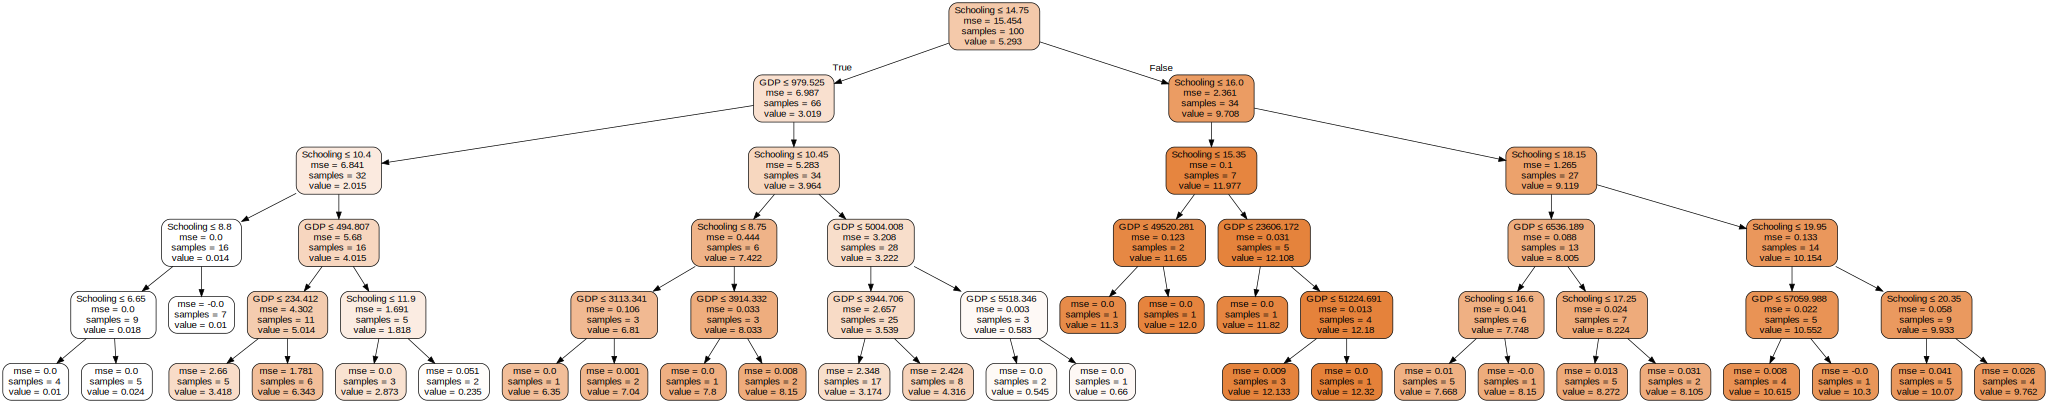

In [5]:
plot_tree_regression(dt, features)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
print(df_train.shape, df_test.shape)

(1154, 22) (495, 22)


In [8]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

## The same function but using a for-loop instead of a vectorized operation. 
# def calculate_rmse(predictions, actuals):
#    if(len(predictions) != len(actuals)):
#        raise Exception("The amount of predictions did not equal the amount of actuals")
#    
#    diffSquared = 0
#    
#    for prediction_i, actual_i in zip(predictions, actuals):
#        diffSquared += (prediction_i - actual_i)**2
#        
#    return (diffSquared/len(actuals))**(1/2)

In [9]:
predictionsOnTrainset = dt.predict(df_train[features])
predictionsOnTestset = dt.predict(df_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset[:1154], df_train[:1154]['Alcohol'])
rmseTest = calculate_rmse(predictionsOnTestset[:495], df_train[:495]['Alcohol'])

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 4.10088122513746
RMSE on test set 5.700955462398755
